In [104]:
%reset
import torch
from torch.autograd import Variable
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [105]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    def forward(self, x):
        y = self.linear(x)
        return y

In [106]:
input_dim = 1
output_dim = 1
model = LinearRegressionModel(input_dim, output_dim)
if torch.cuda.is_available():
    model = model.cuda()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [108]:
x_values = [i for i in range(11)]
x_train = np.array(x_values, dtype = 'float32')
x_train = x_train.reshape(-1,1)
y_train = 2*x_train + 1

In [109]:
minLoss = float('inf')
for epoch in range(100):
    epoch = epoch + 1
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))
    optimizer.zero_grad()
    outputs = model.forward(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    print('epoch {}, loss {}'.format(epoch, loss.data[0]))
    if loss < minLoss:
        minLoss = loss
        torch.save(model.state_dict(), 'LinearRegModel.pkl')

C:\Users\karee\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  from ipykernel import kernelapp as app


epoch 1, loss 102.78252410888672
epoch 2, loss 9.01326847076416
epoch 3, loss 1.357776165008545
epoch 4, loss 0.7263897657394409
epoch 5, loss 0.6680150032043457
epoch 6, loss 0.6564552783966064
epoch 7, loss 0.6487906575202942
epoch 8, loss 0.6415183544158936
epoch 9, loss 0.6343523263931274
epoch 10, loss 0.6272684335708618
epoch 11, loss 0.6202639937400818
epoch 12, loss 0.6133374571800232
epoch 13, loss 0.6064882874488831
epoch 14, loss 0.5997158885002136
epoch 15, loss 0.5930190682411194
epoch 16, loss 0.5863968729972839
epoch 17, loss 0.5798485279083252
epoch 18, loss 0.5733736753463745
epoch 19, loss 0.5669707655906677
epoch 20, loss 0.5606394410133362
epoch 21, loss 0.554378867149353
epoch 22, loss 0.5481882691383362
epoch 23, loss 0.5420666337013245
epoch 24, loss 0.5360135436058044
epoch 25, loss 0.5300280451774597
epoch 26, loss 0.5241092443466187
epoch 27, loss 0.5182566046714783
epoch 28, loss 0.5124692916870117
epoch 29, loss 0.5067463517189026
epoch 30, loss 0.5010879635

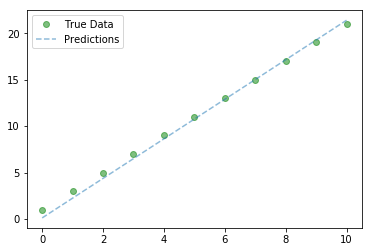

In [110]:
model = LinearRegressionModel(input_dim, output_dim)
if torch.cuda.is_available():
    model = model.cuda()
model.load_state_dict(torch.load('LinearRegModel.pkl'))
if torch.cuda.is_available():
    y_pred = model.forward(inputs).data.cpu().numpy()
else:
    y_pred = model.forward(inputs).data.numpy()    
plt.clf()
plt.plot(x_train, y_train, 'go', alpha = 0.5, label='True Data')
plt.plot(x_train, y_pred, '--', alpha = 0.5, label='Predictions')
plt.legend(loc='best')
plt.show()

In [112]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print (name, param.data)

linear.weight tensor([[2.1280]], device='cuda:0')
linear.bias tensor([0.1112], device='cuda:0')
